In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts, dim
import movingpandas as mpd
from geographiclib.geodesic import Geodesic
import warnings
warnings.filterwarnings('ignore')

import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta

mpd.show_versions()


MovingPandas 0.9.rc2

SYSTEM INFO
-----------
python     : 3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17)  [GCC 9.4.0]
executable : /home/dy/anaconda3/envs/mp/bin/python
machine    : Linux-5.8.0-44-generic-x86_64-with-glibc2.31

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.10.1
GEOS lib   : /home/dy/anaconda3/envs/mp/lib/libgeos_c.so
GDAL       : 3.4.1
GDAL data dir: /home/dy/anaconda3/envs/mp/share/gdal
PROJ       : 8.2.1
PROJ data dir: /home/dy/anaconda3/envs/mp/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.10.2
pandas     : 1.3.5
fiona      : 1.8.20
numpy      : 1.21.5
shapely    : 1.8.0
rtree      : 0.9.7
pyproj     : 3.3.0
matplotlib : 3.5.1
mapclassify: 2.4.3
geopy      : 2.2.0
holoviews  : 1.14.7
hvplot     : 0.7.3
geoviews   : 1.9.3


In [2]:
FSIZE = 500

In [3]:
# filepath
fp = pd.read_csv('data/dtg_20191223.csv')
fp.head

<bound method NDFrame.head of               timestamp   vehicleid   latitude   longitude   speed
0        20191223000000         217  36.366880  127.323668      35
1        20191223000001         217  36.366858  127.323780      38
2        20191223000002         217  36.366848  127.323903      41
3        20191223000003         217  36.366843  127.324033      44
4        20191223000004         217  36.366840  127.324175      47
...                 ...         ...        ...         ...     ...
7039497  20191223203934        2595  36.343698  127.369883      52
7039498  20191223203935        2595  36.343595  127.369985      53
7039499  20191223203936        2595  36.343496  127.370095      54
7039500  20191223203937        2595  36.343398  127.370210      54
7039501  20191223203938        2595  36.343301  127.370320      56

[7039502 rows x 5 columns]>

In [4]:
fp.timestamp = fp.timestamp.astype(str)

In [5]:
fp['timestamp'] = pd.to_datetime(fp['timestamp'], format="%Y%m%d%H%M%S")

In [6]:
fp.columns = ['t', 'trajectory_id', 'y', 'x', 'speed']

In [7]:
fp.head()

t  trajectory_id          y           x  speed
0 2019-12-23 00:00:00            217  36.366880  127.323668     35
1 2019-12-23 00:00:01            217  36.366858  127.323780     38
2 2019-12-23 00:00:02            217  36.366848  127.323903     41
3 2019-12-23 00:00:03            217  36.366843  127.324033     44
4 2019-12-23 00:00:04            217  36.366840  127.324175     47

In [8]:
fp0001 = fp[(fp['t']>'2019-12-23 00:00:00') & (fp['t']<'2019-12-23 01:00:00')]
fp0102 = fp[(fp['t']>'2019-12-23 01:00:00') & (fp['t']<'2019-12-23 02:00:00')]
fp0203 = fp[(fp['t']>'2019-12-23 02:00:00') & (fp['t']<'2019-12-23 03:00:00')]
fp0304 = fp[(fp['t']>'2019-12-23 03:00:00') & (fp['t']<'2019-12-23 04:00:00')]
fp0405 = fp[(fp['t']>'2019-12-23 04:00:00') & (fp['t']<'2019-12-23 05:00:00')]
fp0506 = fp[(fp['t']>'2019-12-23 05:00:00') & (fp['t']<'2019-12-23 06:00:00')]
fp0607 = fp[(fp['t']>'2019-12-23 06:00:00') & (fp['t']<'2019-12-23 07:00:00')]
fp0708 = fp[(fp['t']>'2019-12-23 07:00:00') & (fp['t']<'2019-12-23 08:00:00')]
fp0809 = fp[(fp['t']>'2019-12-23 08:00:00') & (fp['t']<'2019-12-23 09:00:00')]
fp0910 = fp[(fp['t']>'2019-12-23 09:00:00') & (fp['t']<'2019-12-23 10:00:00')]
fp1011 = fp[(fp['t']>'2019-12-23 10:00:00') & (fp['t']<'2019-12-23 11:00:00')]
fp1112 = fp[(fp['t']>'2019-12-23 11:00:00') & (fp['t']<'2019-12-23 12:00:00')]
fp1213 = fp[(fp['t']>'2019-12-23 12:00:00') & (fp['t']<'2019-12-23 13:00:00')]
fp1314 = fp[(fp['t']>'2019-12-23 13:00:00') & (fp['t']<'2019-12-23 14:00:00')]
fp1415 = fp[(fp['t']>'2019-12-23 14:00:00') & (fp['t']<'2019-12-23 15:00:00')]
fp1516 = fp[(fp['t']>'2019-12-23 15:00:00') & (fp['t']<'2019-12-23 16:00:00')]
fp1617 = fp[(fp['t']>'2019-12-23 16:00:00') & (fp['t']<'2019-12-23 17:00:00')]
fp1718 = fp[(fp['t']>'2019-12-23 17:00:00') & (fp['t']<'2019-12-23 18:00:00')]
fp1819 = fp[(fp['t']>'2019-12-23 18:00:00') & (fp['t']<'2019-12-23 19:00:00')]
fp1920 = fp[(fp['t']>'2019-12-23 19:00:00') & (fp['t']<'2019-12-23 20:00:00')]
fp2021 = fp[(fp['t']>'2019-12-23 20:00:00') & (fp['t']<'2019-12-23 21:00:00')]
fp2122 = fp[(fp['t']>'2019-12-23 21:00:00') & (fp['t']<'2019-12-23 22:00:00')]
fp2223 = fp[(fp['t']>'2019-12-23 22:00:00') & (fp['t']<'2019-12-23 23:00:00')]
fp2324 = fp[(fp['t']>'2019-12-23 23:00:00') & (fp['t']<'2019-12-23 23:59:59')]

In [9]:
fp_all = fp[(fp['t']>'2019-12-23 00:00:00') & (fp['t']<'2019-12-23 23:59:59')]

In [16]:
traj_collection_0001 = mpd.TrajectoryCollection(fp0001, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0102 = mpd.TrajectoryCollection(fp0102, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0203 = mpd.TrajectoryCollection(fp0203, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0304 = mpd.TrajectoryCollection(fp0304, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0405 = mpd.TrajectoryCollection(fp0405, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0506 = mpd.TrajectoryCollection(fp0506, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0607 = mpd.TrajectoryCollection(fp0607, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0708 = mpd.TrajectoryCollection(fp0708, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0809 = mpd.TrajectoryCollection(fp0809, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0910 = mpd.TrajectoryCollection(fp0910, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1011 = mpd.TrajectoryCollection(fp1011, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1112 = mpd.TrajectoryCollection(fp1112, 'trajectory_id',t='t', x='x', y='y')

traj_collection_1213 = mpd.TrajectoryCollection(fp1213, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1314 = mpd.TrajectoryCollection(fp1314, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1415 = mpd.TrajectoryCollection(fp1415, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1516 = mpd.TrajectoryCollection(fp1516, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1617 = mpd.TrajectoryCollection(fp1617, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1718 = mpd.TrajectoryCollection(fp1718, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1819 = mpd.TrajectoryCollection(fp1819, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1920 = mpd.TrajectoryCollection(fp1920, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2021 = mpd.TrajectoryCollection(fp2021, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2122 = mpd.TrajectoryCollection(fp2122, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2223 = mpd.TrajectoryCollection(fp2223, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2324 = mpd.TrajectoryCollection(fp2324, 'trajectory_id',t='t', x='x', y='y')

In [10]:
traj_collection_all = mpd.TrajectoryCollection(fp_all, 'trajectory_id',t='t', x='x', y='y')

In [11]:
print(traj_collection_all)

TrajectoryCollection with 1939 trajectories


## [DTG] 대전시 차량 흐름도 

주행경로 시각화를 확인한 결과, 통행량이 많은 포인트와 구간에 가중치를 부여해 트래픽이 몰리는 지점과 구간을 시각화 하고 싶음.

<AxesSubplot:>

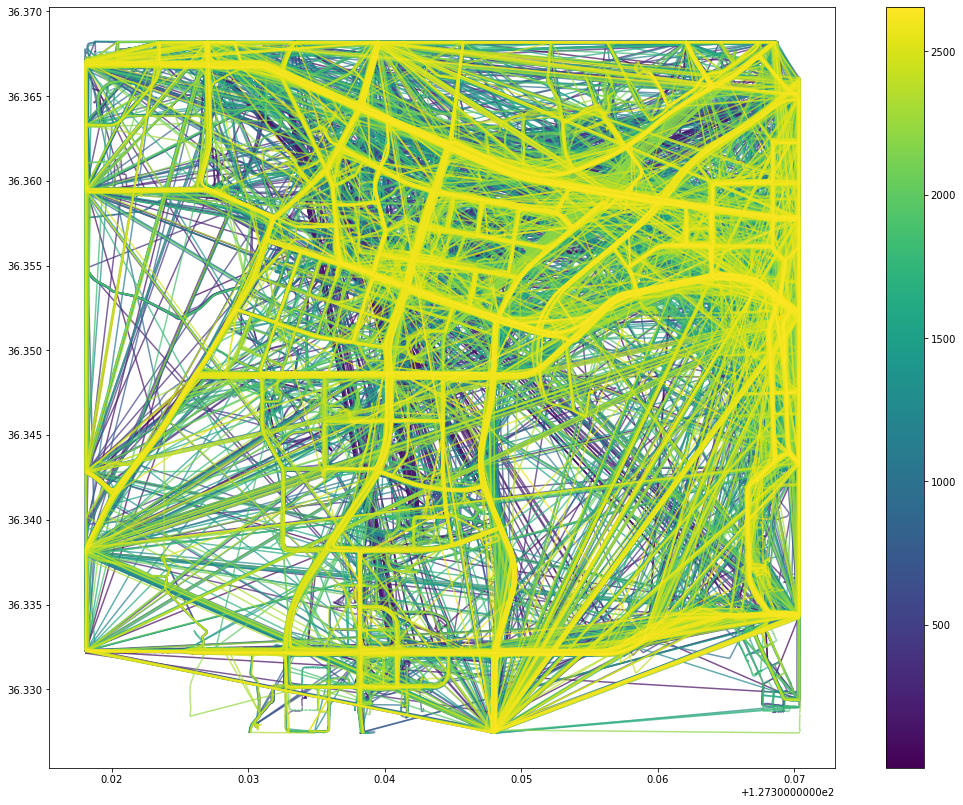

In [13]:
traj_collection_all.plot(column='trajectory_id', legend=True, figsize=(18,14), alpha=0.7)

#### 거리를 기준으로 일반화 

In [17]:
generalized_0001 = mpd.MinDistanceGeneralizer(traj_collection_0001).generalize(tolerance=100)
generalized_0102 = mpd.MinDistanceGeneralizer(traj_collection_0102).generalize(tolerance=100)
generalized_0203 = mpd.MinDistanceGeneralizer(traj_collection_0203).generalize(tolerance=100)
generalized_0304 = mpd.MinDistanceGeneralizer(traj_collection_0304).generalize(tolerance=100)
generalized_0405 = mpd.MinDistanceGeneralizer(traj_collection_0405).generalize(tolerance=100)
generalized_0506 = mpd.MinDistanceGeneralizer(traj_collection_0506).generalize(tolerance=100)
generalized_0607 = mpd.MinDistanceGeneralizer(traj_collection_0607).generalize(tolerance=100)
generalized_0708 = mpd.MinDistanceGeneralizer(traj_collection_0708).generalize(tolerance=100)
generalized_0809 = mpd.MinDistanceGeneralizer(traj_collection_0809).generalize(tolerance=100)
generalized_0910 = mpd.MinDistanceGeneralizer(traj_collection_0910).generalize(tolerance=100)
generalized_1011 = mpd.MinDistanceGeneralizer(traj_collection_1011).generalize(tolerance=100)
generalized_1112 = mpd.MinDistanceGeneralizer(traj_collection_1112).generalize(tolerance=100)

generalized_1213 = mpd.MinDistanceGeneralizer(traj_collection_1213).generalize(tolerance=100)
generalized_1314 = mpd.MinDistanceGeneralizer(traj_collection_1314).generalize(tolerance=100)
generalized_1415 = mpd.MinDistanceGeneralizer(traj_collection_1415).generalize(tolerance=100)
generalized_1516 = mpd.MinDistanceGeneralizer(traj_collection_1516).generalize(tolerance=100)
generalized_1617 = mpd.MinDistanceGeneralizer(traj_collection_1617).generalize(tolerance=100)
generalized_1718 = mpd.MinDistanceGeneralizer(traj_collection_1718).generalize(tolerance=100)
generalized_1819 = mpd.MinDistanceGeneralizer(traj_collection_1819).generalize(tolerance=100)
generalized_1920 = mpd.MinDistanceGeneralizer(traj_collection_1920).generalize(tolerance=100)
generalized_2021 = mpd.MinDistanceGeneralizer(traj_collection_2021).generalize(tolerance=100)
generalized_2122 = mpd.MinDistanceGeneralizer(traj_collection_2122).generalize(tolerance=100)
generalized_2223 = mpd.MinDistanceGeneralizer(traj_collection_2223).generalize(tolerance=100)
generalized_2324 = mpd.MinDistanceGeneralizer(traj_collection_2324).generalize(tolerance=100)

In [12]:
generalized_all = mpd.MinDistanceGeneralizer(traj_collection_all).generalize(tolerance=100)

In [ ]:
print(generalized_0910)
print(generalized_1819)

In [15]:
# 시간을 기준으로 일반화 
# generalized_0001 = mpd.MinTimeDeltaGeneralizer(traj_collection_0001).generalize(tolerance=timedelta(minutes=10))
# generalized_0001

#### 

In [18]:
aggregator_0001 = mpd.TrajectoryCollectionAggregator(generalized_0001, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0102 = mpd.TrajectoryCollectionAggregator(generalized_0102, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0203 = mpd.TrajectoryCollectionAggregator(generalized_0203, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0304 = mpd.TrajectoryCollectionAggregator(generalized_0304, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0405 = mpd.TrajectoryCollectionAggregator(generalized_0405, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0506 = mpd.TrajectoryCollectionAggregator(generalized_0506, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0607 = mpd.TrajectoryCollectionAggregator(generalized_0607, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0708 = mpd.TrajectoryCollectionAggregator(generalized_0708, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0809 = mpd.TrajectoryCollectionAggregator(generalized_0809, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0910 = mpd.TrajectoryCollectionAggregator(generalized_0910, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1011 = mpd.TrajectoryCollectionAggregator(generalized_1011, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1112 = mpd.TrajectoryCollectionAggregator(generalized_1112, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))

aggregator_1213 = mpd.TrajectoryCollectionAggregator(generalized_1213, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1314 = mpd.TrajectoryCollectionAggregator(generalized_1314, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1415 = mpd.TrajectoryCollectionAggregator(generalized_1415, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1516 = mpd.TrajectoryCollectionAggregator(generalized_1516, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1617 = mpd.TrajectoryCollectionAggregator(generalized_1617, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1718 = mpd.TrajectoryCollectionAggregator(generalized_1718, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1819 = mpd.TrajectoryCollectionAggregator(generalized_1819, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1920 = mpd.TrajectoryCollectionAggregator(generalized_1920, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2021 = mpd.TrajectoryCollectionAggregator(generalized_2021, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2122 = mpd.TrajectoryCollectionAggregator(generalized_2122, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2223 = mpd.TrajectoryCollectionAggregator(generalized_2223, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2324 = mpd.TrajectoryCollectionAggregator(generalized_2324, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))

In [13]:
aggregator_all = mpd.TrajectoryCollectionAggregator(generalized_all, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))

In [ ]:
print(aggregator_0910)
print(aggregator_1819)

In [19]:
pts_0001 = aggregator_0001.get_significant_points_gdf()
pts_0102 = aggregator_0102.get_significant_points_gdf()
pts_0203 = aggregator_0203.get_significant_points_gdf()
pts_0304 = aggregator_0304.get_significant_points_gdf()
pts_0405 = aggregator_0405.get_significant_points_gdf()
pts_0506 = aggregator_0506.get_significant_points_gdf()
pts_0607 = aggregator_0607.get_significant_points_gdf()
pts_0708 = aggregator_0708.get_significant_points_gdf()
pts_0809 = aggregator_0809.get_significant_points_gdf()
pts_0910 = aggregator_0910.get_significant_points_gdf()
pts_1011 = aggregator_1011.get_significant_points_gdf()
pts_1112 = aggregator_1112.get_significant_points_gdf()

pts_1213 = aggregator_1213.get_significant_points_gdf()
pts_1314 = aggregator_1314.get_significant_points_gdf()
pts_1415 = aggregator_1415.get_significant_points_gdf()
pts_1516 = aggregator_1516.get_significant_points_gdf()
pts_1617 = aggregator_1617.get_significant_points_gdf()
pts_1718 = aggregator_1718.get_significant_points_gdf()
pts_1819 = aggregator_1819.get_significant_points_gdf()
pts_1920 = aggregator_1920.get_significant_points_gdf()
pts_2021 = aggregator_2021.get_significant_points_gdf()
pts_2122 = aggregator_2122.get_significant_points_gdf()
pts_2223 = aggregator_2223.get_significant_points_gdf()
pts_2324 = aggregator_2324.get_significant_points_gdf()

In [14]:
pts_all = aggregator_all.get_significant_points_gdf()

In [ ]:
print(pts_0910)
print(pts_1819)

### cluster

다중 교차하는 지점에 대한 clustering

In [20]:
clusters_0001 = aggregator_0001.get_clusters_gdf()
clusters_0102 = aggregator_0102.get_clusters_gdf()
clusters_0203 = aggregator_0203.get_clusters_gdf()
clusters_0304 = aggregator_0304.get_clusters_gdf()
clusters_0405 = aggregator_0405.get_clusters_gdf()
clusters_0506 = aggregator_0506.get_clusters_gdf()
clusters_0607 = aggregator_0607.get_clusters_gdf()
clusters_0708 = aggregator_0708.get_clusters_gdf()
clusters_0809 = aggregator_0809.get_clusters_gdf()
clusters_0910 = aggregator_0910.get_clusters_gdf()
clusters_1011 = aggregator_1011.get_clusters_gdf()
clusters_1112 = aggregator_1112.get_clusters_gdf()

clusters_1213 = aggregator_1213.get_clusters_gdf()
clusters_1314 = aggregator_1314.get_clusters_gdf()
clusters_1415 = aggregator_1415.get_clusters_gdf()
clusters_1516 = aggregator_1516.get_clusters_gdf()
clusters_1617 = aggregator_1617.get_clusters_gdf()
clusters_1718 = aggregator_1718.get_clusters_gdf()
clusters_1819 = aggregator_1819.get_clusters_gdf()
clusters_1920 = aggregator_1920.get_clusters_gdf()
clusters_2021 = aggregator_2021.get_clusters_gdf()
clusters_2122 = aggregator_2122.get_clusters_gdf()
clusters_2223 = aggregator_2223.get_clusters_gdf()
clusters_2324 = aggregator_2324.get_clusters_gdf()

In [15]:
clusters_all = aggregator_all.get_clusters_gdf()
clusters_all

In [21]:
clusters = pd.concat([clusters_0001, clusters_0102, clusters_0203, clusters_0304, clusters_0405, clusters_0506, clusters_0607,
                     clusters_0708, clusters_0809, clusters_0910, clusters_1011, clusters_1112, clusters_1213, clusters_1314, 
                     clusters_1415, clusters_1516, clusters_1617, clusters_1718, clusters_1819, clusters_1920, clusters_2021, 
                     clusters_2122, clusters_2223, clusters_2324])

In [22]:
clusters

geometry    n
0   POINT (127.32670 36.36723)  351
1   POINT (127.36947 36.34374)  159
2   POINT (127.33373 36.36586)  246
3   POINT (127.33807 36.36304)  504
4   POINT (127.33718 36.35646)  278
..                         ...  ...
56  POINT (127.34489 36.33224)   98
57  POINT (127.35207 36.34748)   23
58  POINT (127.36594 36.33987)  132
59  POINT (127.36971 36.34350)  232
60  POINT (127.35602 36.36618)   39

[1426 rows x 2 columns]

In [23]:
clusters.to_csv('clusters_191223.csv')

### flow

- cluster 구간에 대한 flow(origin -> dest) 생성
-  date type merge 

In [24]:
# before -> after flows
flows_0001 = aggregator_0001.get_flows_gdf()
flows_0102 = aggregator_0102.get_flows_gdf()
flows_0203 = aggregator_0203.get_flows_gdf()
flows_0304 = aggregator_0304.get_flows_gdf()
flows_0405 = aggregator_0405.get_flows_gdf()
flows_0506 = aggregator_0506.get_flows_gdf()
flows_0607 = aggregator_0607.get_flows_gdf()
flows_0708 = aggregator_0708.get_flows_gdf()
flows_0809 = aggregator_0809.get_flows_gdf()
flows_0910 = aggregator_0910.get_flows_gdf()
flows_1011 = aggregator_1011.get_flows_gdf()
flows_1112 = aggregator_1112.get_flows_gdf()

flows_1213 = aggregator_1213.get_flows_gdf()
flows_1314 = aggregator_1314.get_flows_gdf()
flows_1415 = aggregator_1415.get_flows_gdf()
flows_1516 = aggregator_1516.get_flows_gdf()
flows_1617 = aggregator_1617.get_flows_gdf()
flows_1718 = aggregator_1718.get_flows_gdf()
flows_1819 = aggregator_1819.get_flows_gdf()
flows_1920 = aggregator_1920.get_flows_gdf()
flows_2021 = aggregator_2021.get_flows_gdf()
flows_2122 = aggregator_2122.get_flows_gdf()
flows_2223 = aggregator_2223.get_flows_gdf()
flows_2324 = aggregator_2324.get_flows_gdf()

In [16]:
flows_all = aggregator_all.get_flows_gdf()

In [17]:
flows_all.head()

geometry  weight
0  LINESTRING (127.36927 36.35776, 127.36345 36.3...    1163
1  LINESTRING (127.36345 36.35790, 127.36445 36.3...     263
2  LINESTRING (127.36445 36.36253, 127.36927 36.3...     137
3  LINESTRING (127.36927 36.35776, 127.36898 36.3...     270
4  LINESTRING (127.36898 36.36557, 127.36445 36.3...     441

In [25]:
flows_0001['time'] = '2019-12-23 01:00:00'
flows_0102['time'] = '2019-12-23 02:00:00'
flows_0203['time'] = '2019-12-23 03:00:00'
flows_0304['time'] = '2019-12-23 04:00:00'
flows_0405['time'] = '2019-12-23 05:00:00'
flows_0506['time'] = '2019-12-23 06:00:00'
flows_0607['time'] = '2019-12-23 07:00:00'
flows_0708['time'] = '2019-12-23 08:00:00'
flows_0809['time'] = '2019-12-23 09:00:00'
flows_0910['time'] = '2019-12-23 10:00:00'
flows_1011['time'] = '2019-12-23 11:00:00'
flows_1112['time'] = '2019-12-23 12:00:00'
flows_1213['time'] = '2019-12-23 13:00:00'

flows_1314['time'] = '2019-12-23 14:00:00'
flows_1415['time'] = '2019-12-23 15:00:00'
flows_1516['time'] = '2019-12-23 16:00:00'
flows_1617['time'] = '2019-12-23 17:00:00'
flows_1718['time'] = '2019-12-23 18:00:00'
flows_1819['time'] = '2019-12-23 19:00:00'
flows_1920['time'] = '2019-12-23 20:00:00'
flows_2021['time'] = '2019-12-23 21:00:00'
flows_2122['time'] = '2019-12-23 22:00:00'
flows_2223['time'] = '2019-12-23 23:00:00'
flows_2324['time'] = '2019-12-23 23:59:59'

In [ ]:
flows_0809

In [26]:
flows = pd.concat([flows_0001, flows_0102, flows_0203, flows_0304, flows_0405, flows_0506, flows_0607,
                     flows_0708, flows_0809, flows_0910, flows_1011, flows_1112, flows_1213, flows_1314, 
                     flows_1415, flows_1516, flows_1617, flows_1718,flows_1819, flows_1920, flows_2021, 
                     flows_2122, flows_2223,flows_2324])

In [27]:
flows.head()

geometry  weight  \
0  LINESTRING (127.32670 36.36723, 127.33373 36.3...      55   
1  LINESTRING (127.33373 36.36586, 127.33124 36.3...       3   
2  LINESTRING (127.33124 36.36188, 127.33807 36.3...       3   
3  LINESTRING (127.33807 36.36304, 127.33718 36.3...      52   
4  LINESTRING (127.33718 36.35646, 127.34069 36.3...      68   

                  time  
0  2019-12-23 01:00:00  
1  2019-12-23 01:00:00  
2  2019-12-23 01:00:00  
3  2019-12-23 01:00:00  
4  2019-12-23 01:00:00

In [28]:
flows.to_csv('flows_191223.csv')

시간대별로 DTG 차량의 주행 경로를 확인하면 전체적인 흐름을 파악할 수는 있지만,    
**주행 경로가 겹치게 되는 구간이 존재할 때 flow가 중첩되어 차량의 이동경로(방향)를 자세히 확인할 수 없는 단점이 있음.** 
  
flows 데이터 프레임에 있는 geometry(before(lat, long) > after (lat, long) 컬럼으로 시간대별 차량이동 흐름 시각화를 진행해 해당 시간에 트래픽이 몰리는 지점의 포인트와 방향을 파악할 수 있도록 하는 것이 목적

In [20]:
(flows_all.hvplot(geo=True,hover_cols=['weight'], alpha=0.04,line_width=dim('weight')*0.8, color=dim('weight'), 
                   tiles='OSM', frame_height=800, frame_width=800) *  clusters_all.hvplot(geo=True, color='red', size=dim('n')*0.3 ))

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Path.I   :Path   [Longitude,Latitude]   (weight)
   .Points.I :Points   [Longitude,Latitude]   (n)